# MLB Metrics Helpers Examples

Example uses for helper functions in mlb_metrics_helpers.py

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import mlb_metrics_helpers

import warnings
warnings.filterwarnings("ignore")

### Create scatter plot of pitch locations, colored by pitch type

In [2]:
# get pitcher data
mikolaus_id = mlb_metrics_helpers.player_id("Mikolas", "Miles")
mikolaus_general_stats = mlb_metrics_helpers.player_general_metrics(
    mikolaus_id, timeline_type="career"
)
mikolaus_timeline = mlb_metrics_helpers.parse_career_timeline(mikolaus_general_stats)
mikolaus_specific_stats = mlb_metrics_helpers.player_specific_metrics(
    mikolaus_id,
    metric_type="pitching",
    start_dt=mikolaus_timeline[0],
    end_dt=mikolaus_timeline[1],
)

mikolaus_specific_stats

Gathering player lookup table. This may take a moment.
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2018-05-04,94.2,-2.45,6.51,"Mikolas, Miles",592178,571945,double,hit_into_play,...,3,0,3,0,3,Standard,Standard,202.0,-0.053,0.718
1,CU,2018-05-04,78.3,-2.27,6.45,"Mikolas, Miles",592178,571945,NaN,called_strike,...,3,0,3,0,3,Standard,Standard,34.0,0.000,-0.051
2,SL,2018-05-04,86.3,-2.46,6.63,"Mikolas, Miles",592178,571945,NaN,called_strike,...,3,0,3,0,3,Standard,Standard,153.0,0.000,-0.036
3,SI,2018-05-04,93.2,-1.97,6.52,"Mikolas, Miles",450314,571945,field_out,hit_into_play,...,3,0,3,0,3,Standard,Standard,235.0,0.020,-0.255
4,CU,2018-05-04,77.5,-2.25,6.45,"Mikolas, Miles",450314,571945,NaN,ball,...,3,0,3,0,3,Standard,Standard,33.0,0.000,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,CU,2018-05-10,80.5,-2.14,6.54,"Mikolas, Miles",608671,571945,NaN,ball,...,1,1,0,0,1,Standard,Standard,28.0,0.000,0.043
13016,CU,2018-05-10,79.1,-2.12,6.42,"Mikolas, Miles",608671,571945,NaN,foul,...,1,1,0,0,1,Strategic,Standard,31.0,0.000,0.000
13017,FF,2018-05-10,97.1,-1.91,6.53,"Mikolas, Miles",608671,571945,NaN,ball,...,1,1,0,0,1,Standard,Standard,209.0,0.000,0.023
13018,FF,2018-05-10,94.4,-2.18,6.61,"Mikolas, Miles",608671,571945,NaN,foul_bunt,...,1,1,0,0,1,Standard,Standard,201.0,0.000,-0.051


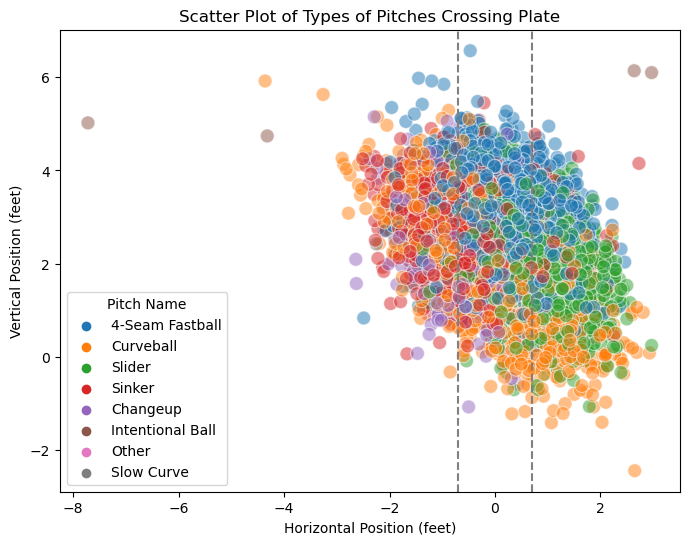

In [3]:
# get location data for different pitches crossing the plate
mikolaus_plate_crossing_metrics = mlb_metrics_helpers.plate_crossing_metrics(mikolaus_specific_stats, "pitching")
pitch_name_locations = mikolaus_plate_crossing_metrics[['pitch_name', 'plate_x', 'plate_z']]

# Set up the plot
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(data=pitch_name_locations, x="plate_x", y="plate_z", hue="pitch_name", s=100, alpha=0.5)

# Customize the axes
plt.axvline(x=-0.71, color='gray', linestyle='--')  # left bound of strike zone (17 inches / 2)
plt.axvline(x=0.71, color='gray', linestyle='--')  # right bound of strike zone (17 inches / 2)

# Add labels and legend
plt.title("Scatter Plot of Types of Pitches Crossing Plate")
plt.xlabel("Horizontal Position (feet)")
plt.ylabel("Vertical Position (feet)")
plt.legend(title="Pitch Name")

# Show plot
plt.show()

### Create various machine learning models for classifying outcome of pitch (pitch zone)

In [4]:
mikolaus_model_data = mlb_metrics_helpers.pitcher_model_data(mikolaus_specific_stats)
mikolaus_model_data

,pitch_type,release_speed,release_pos_x,release_pos_y,release_spin_rate,spin_axis,p_throws,vx0,vy0,vz0,ax,ay,az,zone
0,FF,94.2,-2.45,54.55,2319.0,202.0,R,9.733690,-136.547039,-8.347547,-8.977545,29.991442,-13.601673,14.0
1,CU,78.3,-2.27,55.67,2757.0,34.0,R,3.213866,-113.685528,0.330972,6.686118,23.277507,-43.409795,5.0
2,SL,86.3,-2.46,54.72,2371.0,153.0,R,5.640100,-125.479792,-4.522315,2.195190,23.817224,-25.240157,5.0
3,SI,93.2,-1.97,54.09,2351.0,235.0,R,7.685924,-135.392311,-7.774589,-18.646288,30.631840,-18.774989,8.0
4,CU,77.5,-2.25,55.18,2640.0,33.0,R,1.014720,-112.477903,2.890067,6.294862,22.392686,-43.087035,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,CU,80.5,-2.14,55.44,2600.0,28.0,R,5.529310,-116.837519,-5.378493,4.665743,23.929388,-42.397880,14.0
13016,CU,79.1,-2.12,54.36,2558.0,31.0,R,0.761371,-115.012096,0.239371,6.480165,24.726793,-43.542036,13.0
13017,FF,97.1,-1.91,54.09,2253.0,209.0,R,9.395963,-140.900648,-8.466190,-9.829562,31.611886,-16.812228,14.0
13018,FF,94.4,-2.18,54.32,2161.0,201.0,R,6.675660,-137.256735,-6.066099,-8.243672,30.168799,-13.864550,2.0


In [5]:
sklearn_model_types = ["logistic_regression", "random_forest", "gradient_boosting", "hist_gradient_boosting"]
for model_type in sklearn_model_types:
    model, accuracy = mlb_metrics_helpers.tested_model(mikolaus_model_data, "zone", model_type)
    print(f"{model_type} accuracy: {accuracy}")

logistic_regression accuracy: 0.7368421052631579
random_forest accuracy: 0.6932330827067669
gradient_boosting accuracy: 0.6699248120300751
hist_gradient_boosting accuracy: 0.718796992481203


### Create scatter plot of pitched balls, colored by batting event

In [6]:
# get batter data
kwan_id = mlb_metrics_helpers.player_id("Kwan", "Steven")
kwan_general_stats = mlb_metrics_helpers.player_general_metrics(kwan_id, timeline_type="career")
kwan_timeline = mlb_metrics_helpers.parse_career_timeline(kwan_general_stats)
kwan_specific_stats = mlb_metrics_helpers.player_specific_metrics(
    kwan_id,
    metric_type="batting",
    start_dt=kwan_timeline[0],
    end_dt=kwan_timeline[1],
)

kwan_specific_stats

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2023-10-01,92.6,1.44,5.75,"Kwan, Steven",680757,593958,field_out,hit_into_play,...,3,2,3,2,3,Infield shade,Standard,155.0,0.023,-0.107
1,SI,2023-10-01,90.6,1.50,5.74,"Kwan, Steven",680757,593958,NaN,swinging_strike,...,3,2,3,2,3,Infield shade,Standard,153.0,0.000,-0.036
2,SL,2023-10-01,82.0,1.64,5.76,"Kwan, Steven",680757,593958,NaN,called_strike,...,3,2,3,2,3,Standard,Standard,270.0,0.000,-0.026
3,SL,2023-10-01,84.0,1.64,5.64,"Kwan, Steven",680757,593958,strikeout,foul_tip,...,2,0,2,0,2,Infield shade,Standard,234.0,0.031,-0.271
4,SI,2023-10-01,92.8,1.62,5.61,"Kwan, Steven",680757,593958,NaN,blocked_ball,...,2,0,2,0,2,Infield shade,Standard,147.0,0.000,0.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5745,FF,2022-04-07,92.5,-2.20,5.13,"Kwan, Steven",680757,605130,NaN,called_strike,...,3,1,3,1,3,Standard,Standard,222.0,0.000,-0.024
5746,FF,2022-04-07,94.3,0.98,5.11,"Kwan, Steven",680757,641394,NaN,foul,...,1,1,1,1,1,Standard,Standard,141.0,0.000,-0.066
5747,SL,2022-04-07,84.5,0.86,5.18,"Kwan, Steven",680757,641394,NaN,ball,...,1,1,1,1,1,Standard,Standard,312.0,0.000,0.049
5748,FF,2022-04-07,94.7,1.18,5.01,"Kwan, Steven",680757,641394,NaN,called_strike,...,1,1,1,1,1,Standard,Standard,132.0,0.000,-0.043


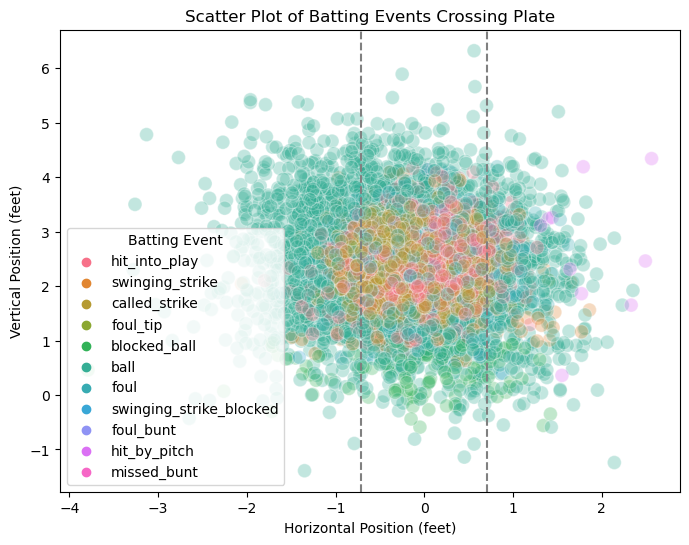

In [7]:
# get location data for batting events crossing the plate
kwan_plate_crossing_metrics = mlb_metrics_helpers.plate_crossing_metrics(kwan_specific_stats, "batting")
description_locations = kwan_plate_crossing_metrics[['description', 'plate_x', 'plate_z']]

# Set up the plot
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(data=description_locations, x="plate_x", y="plate_z", hue="description", s=100, alpha=0.3)

# Customize the axes
plt.axvline(x=-0.71, color='gray', linestyle='--')  # left bound of strike zone (17 inches / 2)
plt.axvline(x=0.71, color='gray', linestyle='--')  # right bound of strike zone (17 inches / 2)

# Add labels and legend
plt.title("Scatter Plot of Batting Events Crossing Plate")
plt.xlabel("Horizontal Position (feet)")
plt.ylabel("Vertical Position (feet)")
plt.legend(title="Batting Event")

# Show plot
plt.show()

### Create various machine learning models for classifying outcome of swinging bat play (strike or hit into play)

In [8]:
kwan_model_data = mlb_metrics_helpers.batter_model_data(kwan_specific_stats)
kwan_model_data

,pitch_type,release_speed,release_pos_x,release_pos_y,release_spin_rate,spin_axis,p_throws,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,description
0,FF,92.6,1.44,54.26,2129.0,155.0,L,-0.81,2.38,-7.342115,-134.672694,-4.663129,10.399997,26.455690,-21.261783,hit_into_play
1,SI,90.6,1.50,54.30,2009.0,153.0,L,1.65,2.07,-2.155494,-131.934004,-4.429599,14.367138,25.923620,-25.155462,swinging_strike
8,SL,84.1,1.59,54.23,2034.0,240.0,L,-0.78,1.35,-5.374739,-122.375902,-3.517711,0.530487,25.721885,-32.262068,hit_into_play
12,SL,88.0,-2.98,54.42,2374.0,3.0,R,-0.10,1.21,5.940506,-127.954971,-3.697624,3.976734,28.956606,-32.707771,hit_into_play
15,FF,97.1,-1.46,54.43,2548.0,203.0,R,-0.41,3.21,4.533445,-141.313935,-4.523667,-11.203732,32.608393,-12.439252,swinging_strike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714,CH,89.0,-1.50,54.60,1609.0,195.0,R,-0.07,2.01,4.285850,-129.447462,-5.838543,-5.288891,26.973548,-22.767128,hit_into_play
5721,SI,98.8,-0.67,53.84,2114.0,192.0,R,0.22,3.16,4.414959,-143.760394,-6.126138,-12.757957,31.431721,-13.487079,hit_into_play
5725,FF,96.5,-2.53,53.99,2387.0,213.0,R,0.23,2.97,8.284943,-140.396638,-3.847628,-7.025644,27.948259,-20.206820,hit_into_play
5737,CH,84.8,-1.28,54.47,1600.0,231.0,R,-0.08,1.99,5.259842,-123.395694,-4.068940,-13.768779,23.470292,-28.348166,hit_into_play


In [9]:
sklearn_model_types = ["logistic_regression", "random_forest", "gradient_boosting", "hist_gradient_boosting"]
for model_type in sklearn_model_types:
    model, accuracy = mlb_metrics_helpers.tested_model(kwan_model_data, "description", model_type)
    print(f"{model_type} accuracy: {accuracy}")

logistic_regression accuracy: 0.8615384615384616
random_forest accuracy: 0.8923076923076924
gradient_boosting accuracy: 0.8769230769230769
hist_gradient_boosting accuracy: 0.8769230769230769
